In [57]:
# Import Plotting & Computation Library
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Install EasyOCR
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
# Import EasyOCR Library
import easyocr

In [60]:
# Install Tensorflow Library
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
# Import Tensorflow Library
import tensorflow as tf

In [62]:
# reading image
img = cv.imread('/content/sample_data/input_crocin.jpeg')

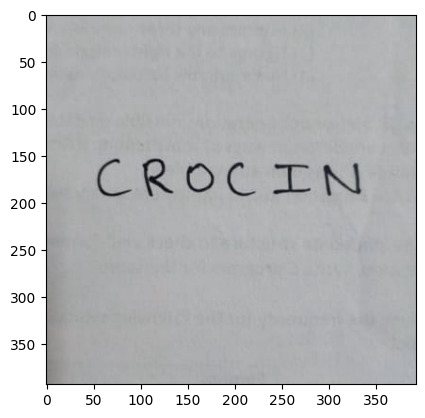

In [63]:
plt.imshow(img,cmap='gray')

In [64]:
# resizing image
width=300
height=300
dim=(width,height)
img2 = cv.resize(img,dim,interpolation=cv.INTER_AREA)

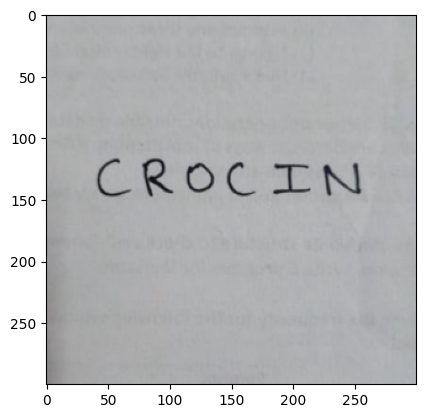

In [65]:
plt.imshow(img2,cmap='gray')

In [66]:
# orignal image shape
img.shape

(393, 393, 3)

In [67]:
# new image shape
img2.shape

(300, 300, 3)

In [68]:
# grayscale conversion
gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

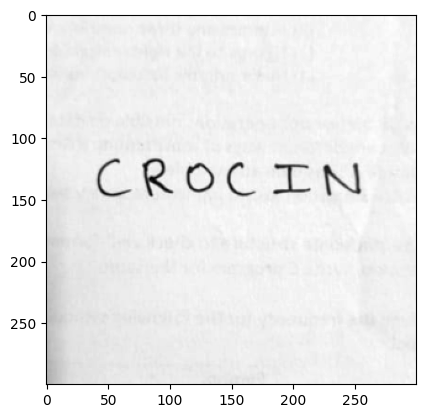

In [69]:
plt.imshow(gray,cmap='gray')

In [70]:
# image normalization
img_norm = cv.normalize(gray, None, 0.0, 255.0, cv.NORM_MINMAX, dtype=cv.CV_8UC1)

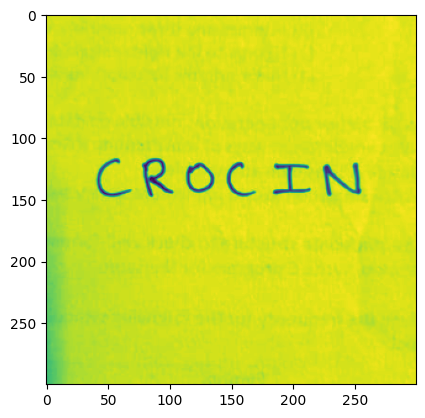

In [71]:
plt.imshow(img_norm)

In [72]:
# image opening
kernel = np.ones((2,2),np.uint8)
img_open = cv.morphologyEx(img_norm, cv.MORPH_OPEN, kernel)

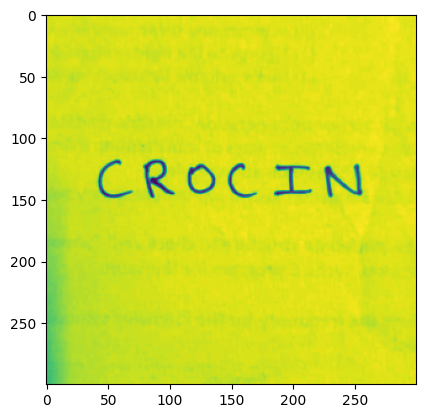

In [73]:
plt.imshow(img_open)

In [74]:
# histogram equalization
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img_norm,img_norm)

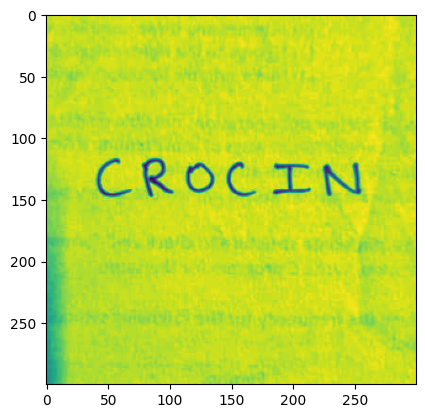

In [75]:
plt.imshow(clahe_img)

In [76]:
# thresholding
ret , img_thresh=cv.threshold(img_norm, 150.0, 255.0, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

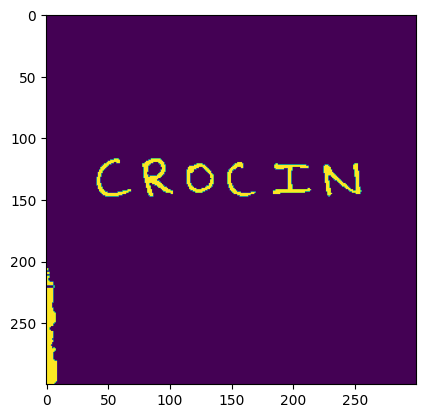

In [77]:
plt.imshow(img_thresh)

In [78]:
# saving file
cv.imwrite("/final_img.jpg",img_thresh)

True

In [79]:
# Split pre-shuffled EMNIST data into dependent and independent variables
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape :", x_train.shape, 
      "\ny_train shape :", y_train.shape,
      "\nx_test shape  :", x_test.shape,
      "\ny_test shape  :", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape : (60000, 28, 28) 
y_train shape : (60000,) 
x_test shape  : (10000, 28, 28) 
y_test shape  : (10000,)


In [80]:
np.random.seed(0)

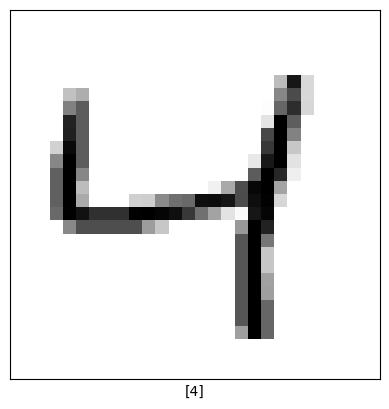

In [81]:
# Training Dataset Example
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[2]])
plt.imshow(x_train[2],cmap=plt.cm.binary)

In [82]:
# Standardize Dataset
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [83]:
# Create Model to construct CNN Structure
model = tf.keras.Sequential()


# First Convolution Layer, Filters = 64, Kernel Size = 2x2, Stride = 1, Input Size = 28x28x1
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1))) 

# Subsampling Layer (Pooling Layer), Pool Size = 2x2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))



# Second Convolution Layer, Filters = 32, Kernel Size = 2x2, Stride = 1
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))

# Subsampling Layer (Pooling Layer), Pool Size = 2x2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Flatten())


# Fully Connected Layer, 1 Hidden Layer, Nodes = 256
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


# Output layer, n = 10
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [84]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
#  Reshape for CNN 
x_train = x_train.reshape(-1,28, 28,1)
x_test = x_test.reshape(-1,28, 28, 1)

In [86]:
model_log=model.fit(x_train, y_train, batch_size=60, epochs=10, verbose=1, validation_split=.3)

Epoch 1/10
700/700 [==============================] - 84s 116ms/step - loss: 0.3994 - accuracy: 0.8718 - val_loss: 0.1096 - val_accuracy: 0.9697
Epoch 2/10
700/700 [==============================] - 68s 97ms/step - loss: 0.1462 - accuracy: 0.9537 - val_loss: 0.0725 - val_accuracy: 0.9771
Epoch 3/10
700/700 [==============================] - 62s 89ms/step - loss: 0.1093 - accuracy: 0.9663 - val_loss: 0.0602 - val_accuracy: 0.9821
Epoch 4/10
700/700 [==============================] - 63s 90ms/step - loss: 0.0904 - accuracy: 0.9715 - val_loss: 0.0529 - val_accuracy: 0.9831
Epoch 5/10
700/700 [==============================] - 63s 89ms/step - loss: 0.0805 - accuracy: 0.9756 - val_loss: 0.0468 - val_accuracy: 0.9857
Epoch 6/10
700/700 [==============================] - 64s 92ms/step - loss: 0.0727 - accuracy: 0.9774 - val_loss: 0.0466 - val_accuracy: 0.9847
Epoch 7/10
700/700 [==============================] - 66s 95ms/step - loss: 0.0651 - accuracy: 0.9795 - val_loss: 0.0446 - val_accuracy

In [87]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy :', score[1]*100)


 Test accuracy : 98.89000058174133


In [88]:
reader = easyocr.Reader(['en'])
output = reader.readtext('/final_img.jpg')

In [89]:
output[-1][1].upper()

'CROCIN'